In [1]:
import numpy as np
import pylab as pl
import seaborn as sns
import pymc3

%pylab inline

Populating the interactive namespace from numpy and matplotlib


(500, 2) (500,)


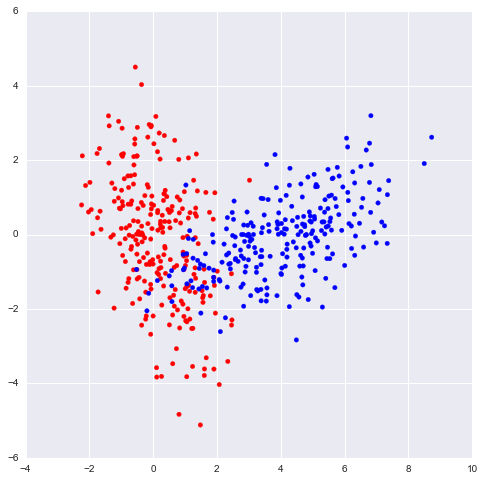

In [64]:
N = 500

x_0 = np.random.multivariate_normal([0.0, 0.0], [[1.0, 0.0], [-1.0, 3.0]], size=N/2)
y_0 = np.zeros(N/2)
x_1 = np.random.multivariate_normal([4.0, 0.0], [[3.0, 1.0], [1.0, 1.0]], size=N/2)
y_1 = np.ones(N/2)

x = np.vstack([x_0, x_1])
y = np.hstack([y_0, y_1])

print x.shape, y.shape
m = x.shape[1]

pl.figure(figsize=(8, 8))
pl.scatter(x[:, 0], x[:, 1], color=['red' if y_i == 0 else 'blue' for y_i in y])
pl.show()

In [65]:
model = pymc3.Model()

with model:
    w = pymc3.Normal('w', mu=0, tau=2. ** -2, shape=(1, m))
    w0 = pymc3.Normal('w0', mu=0, tau=2. ** -2)
    p = pymc3.invlogit(pymc3.sum(w * x, 1) + w0)
    o = pymc3.Bernoulli('y', p, observed=y)

In [66]:
with model:
    # move the chain to the MAP which should be a good starting point
    start = pymc3.find_MAP()
    step = pymc3.NUTS(scaling=start)
    trace = pymc3.sample(50000, step, start)

 [-----------------100%-----------------] 50000 of 50000 complete in 70.0 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12abe5750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1299f2d10>]], dtype=object)

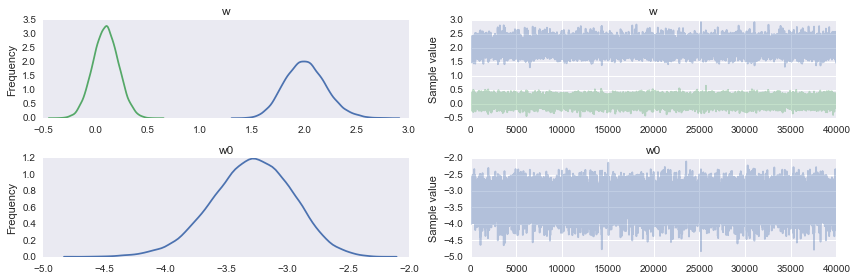

In [67]:
burnin = 10000
pymc3.traceplot(trace[burnin:])

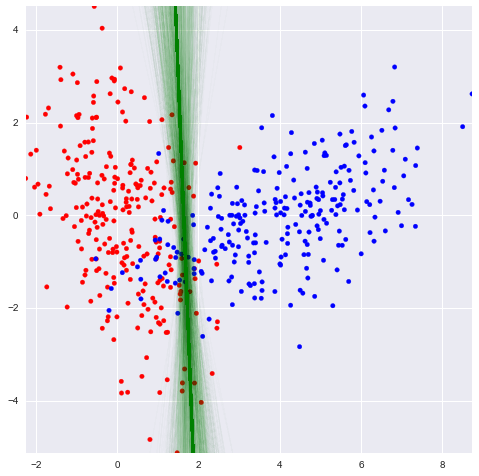

In [68]:
n_samples = 1000
trace["w"][:n_samples].shape

pl.figure(figsize=(8, 8))

for s in xrange(n_samples):
    w0_s = trace[-s]['w0']
    w1_s = trace[-s]['w'][0][0]
    w2_s = trace[-s]['w'][0][1]
    pl.plot(x[:, 0], - w0_s / w2_s - w1_s / w2_s * x[:, 0], '-g', alpha=0.01, lw=0.3)
    
pl.xlim(x[:, 0].min(), x[:, 0].max())
pl.ylim(x[:, 1].min(), x[:, 1].max())

w0_m = trace[-s:]['w0'].mean()
w1_m = trace[-s:]['w'][:, :, 0].mean()
w2_m = trace[-s:]['w'][:, :, 1].mean()
pl.plot(x[:, 0], - w0_m / w2_m - w1_m / w2_m * x[:, 0], 'g', alpha=1, lw=2.5)

pl.scatter(x[:, 0], x[:, 1], color=['red' if y_i == 0 else 'blue' for y_i in y])

pl.show()